<a href="https://colab.research.google.com/github/ManjotSran/Basic_Dapp-/blob/main/3181655_Assignmentone_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Assignment 1**
## Student Name: Manjot Singh Sran
## Student No.: 3181655


 **Importing the necessary libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



#ignore warning to make notebook easy to read
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


**Data Analysis**

In [ ]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_data = pd.read_csv(path)
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
adult_df = pd.read_csv(path, header=None, names=column_names, na_values='?')

In [ ]:
len(list(adult_df[0:1:-1]))

15

In [ ]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Replace ' ?' with NaN (assuming missing values are represented by ' ?')
adult_df = adult_df.replace(' ?', pd.NA)

# Check for missing values
missing_values_count = adult_df.isna().sum()

# Total number of rows with missing values
rows_with_missing_values = adult_df.isna().any(axis=1).sum()

print(missing_values_count, rows_with_missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64 2399


In [ ]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))


all_columns:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Categorical columns:
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical columns:
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
adult_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
len(categorical_columns)

9

In [ ]:
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race', 'sex', 'native_country', 'income']

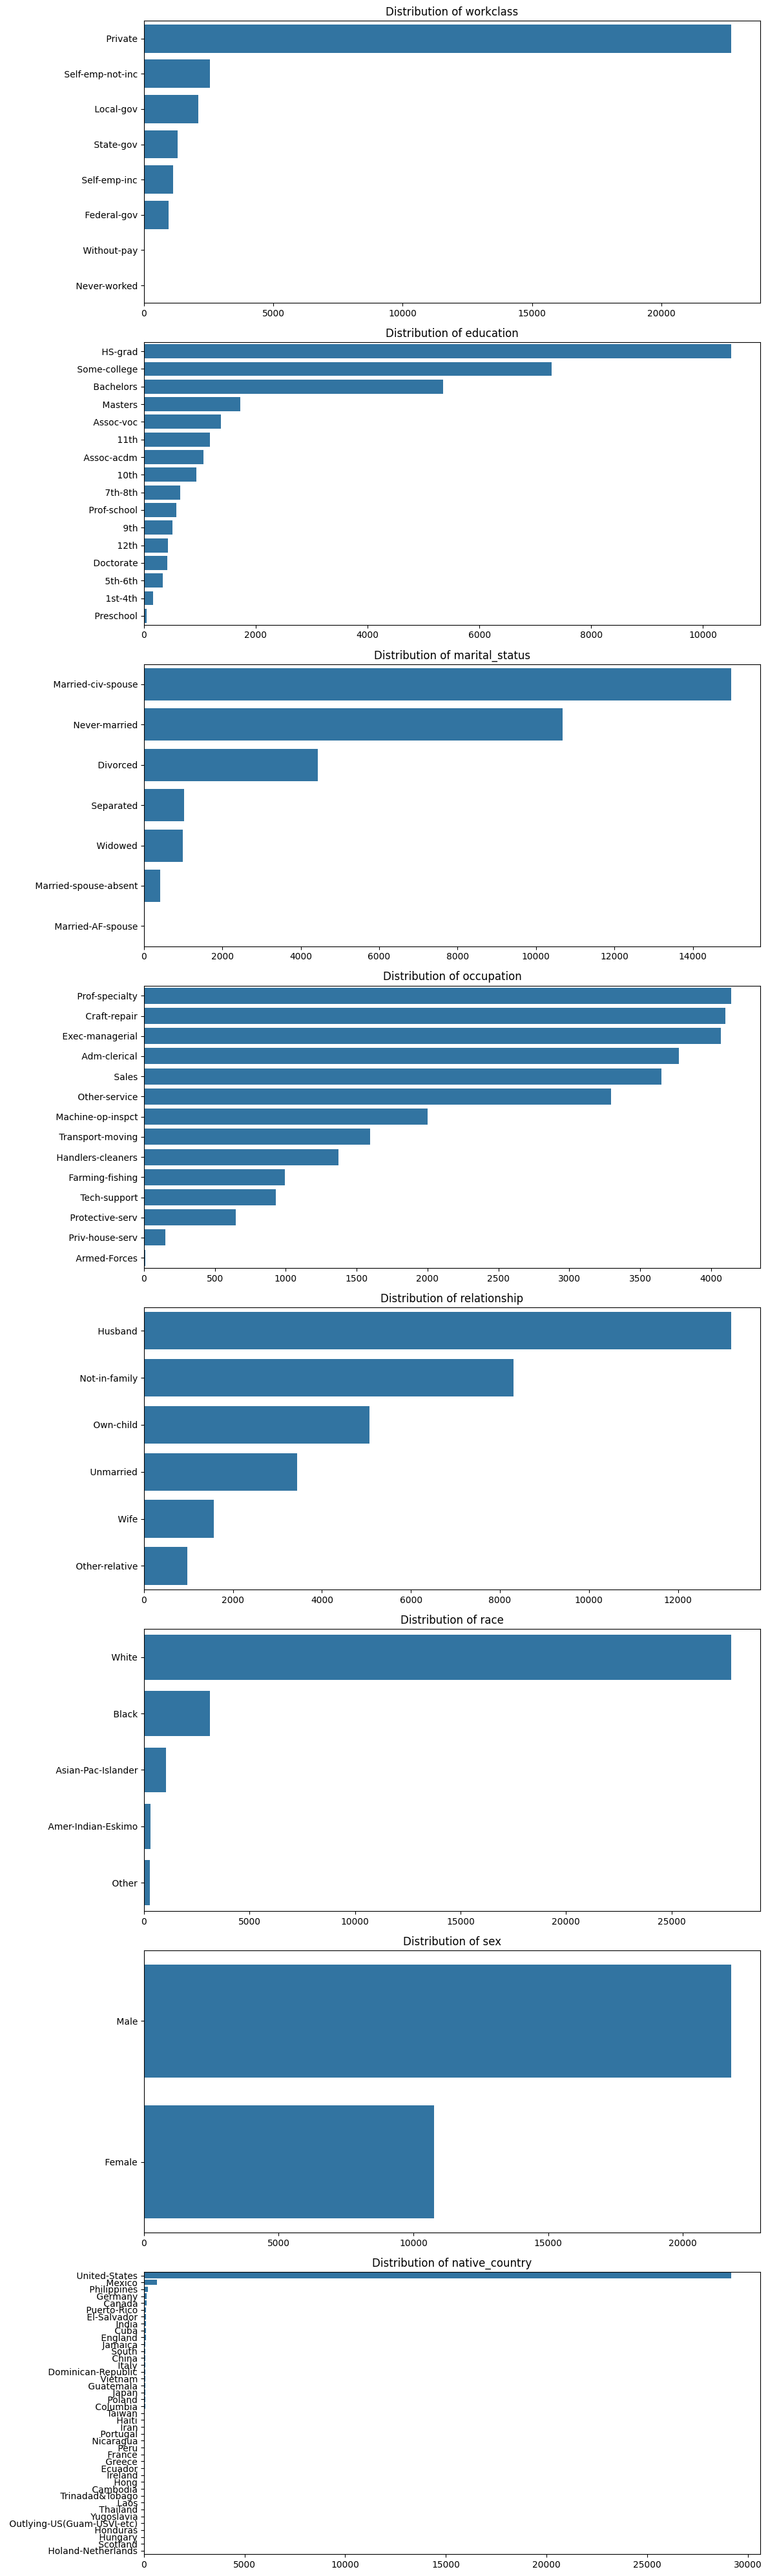

In [ ]:
# Visual analysis of categorical columns
fig, axes = plt.subplots(nrows=len(categorical_columns) - 1, ncols=1, figsize=(12, 40))

for i, col in enumerate(categorical_columns[:-1]):  # Excluding the target variable 'income'
    sns.countplot(y=col, data=adult_data, ax=axes[i], order = adult_data[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Identifying the numerical columns for analysis
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Descriptive statistics of numerical columns
numerical_descriptive_stats = adult_data[numerical_columns].describe()

numerical_descriptive_stats

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


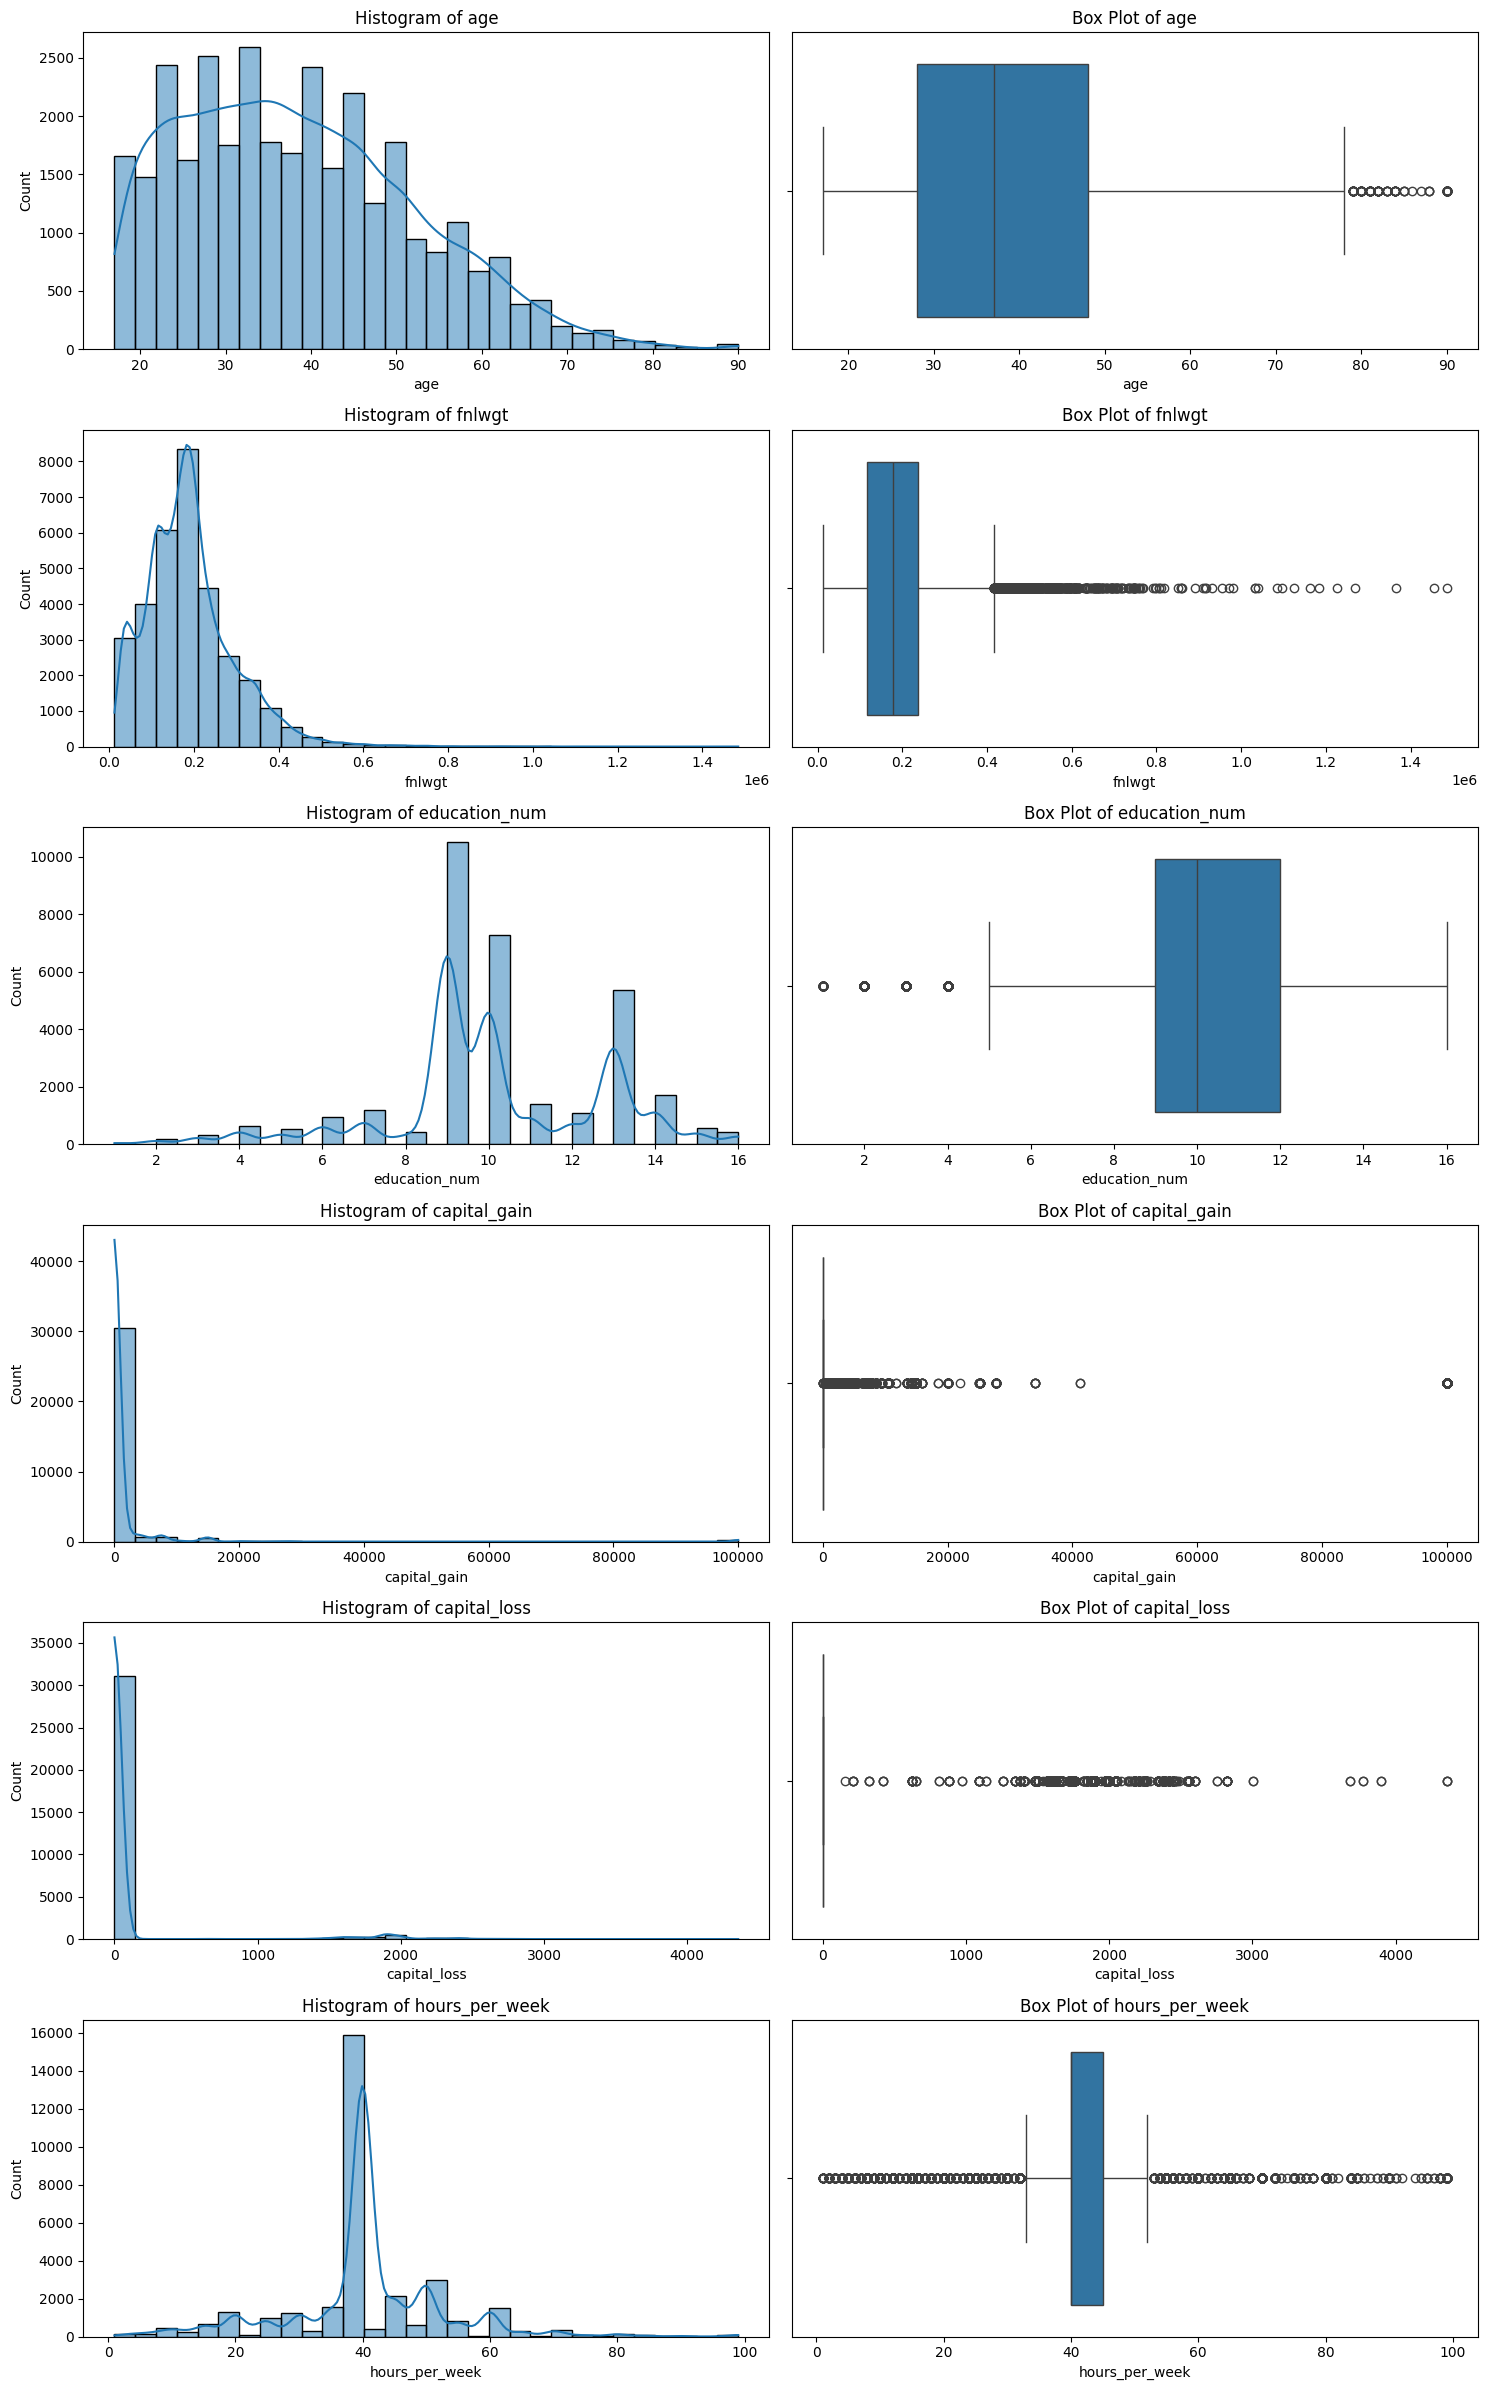

In [ ]:
# Visual analysis of numerical columns using histograms and box plots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 24))

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(adult_data[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Box plot
    sns.boxplot(x=adult_data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

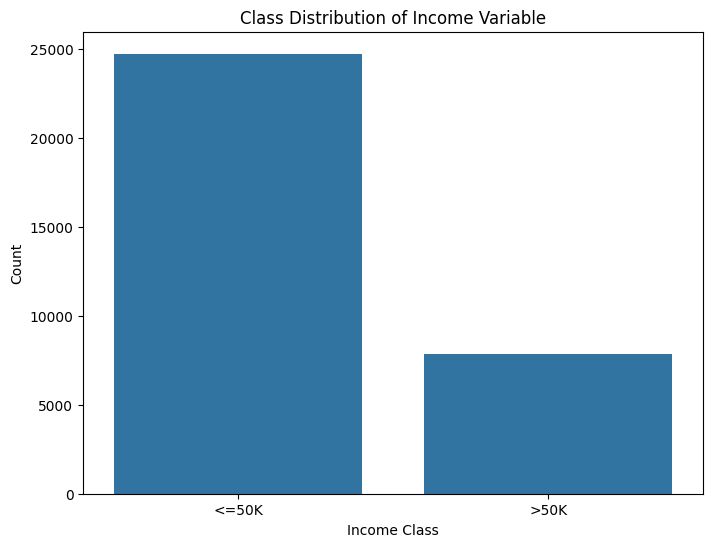

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=adult_df)

plt.title('Class Distribution of Income Variable')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels if necessary
plt.show()

We can observe from the figure above that the target class ('income') is imbalanced, hence it is necessary to apply the sampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to tackle this issue

**Feature Selection**

In [ ]:
from scipy.stats import chi2_contingency

# Re-performing Chi-squared test for each categorical feature against the target variable 'income'
chi2_results_categorical = []

for col in categorical_columns[:-1]:  # Excluding the target variable 'income'
    contingency_table = pd.crosstab(adult_data[col], adult_data['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_categorical.append({'Feature': col, 'Chi2 Score': chi2, 'P-value': p})

# Creating a DataFrame for Chi-squared test results
chi2_categorical_df = pd.DataFrame(chi2_results_categorical).sort_values(by='Chi2 Score', ascending=False)

chi2_categorical_df

,Feature,Chi2 Score,P-value
4,relationship,6699.076897,0.000000e+00
2,marital_status,6517.741654,0.000000e+00
1,education,4429.653302,0.000000e+00
3,occupation,3744.898758,0.000000e+00
6,sex,1517.813409,0.000000e+00
0,workclass,827.718359,1.933848e-174
5,race,330.920431,2.305961e-70
7,native_country,317.087663,8.280446e-45


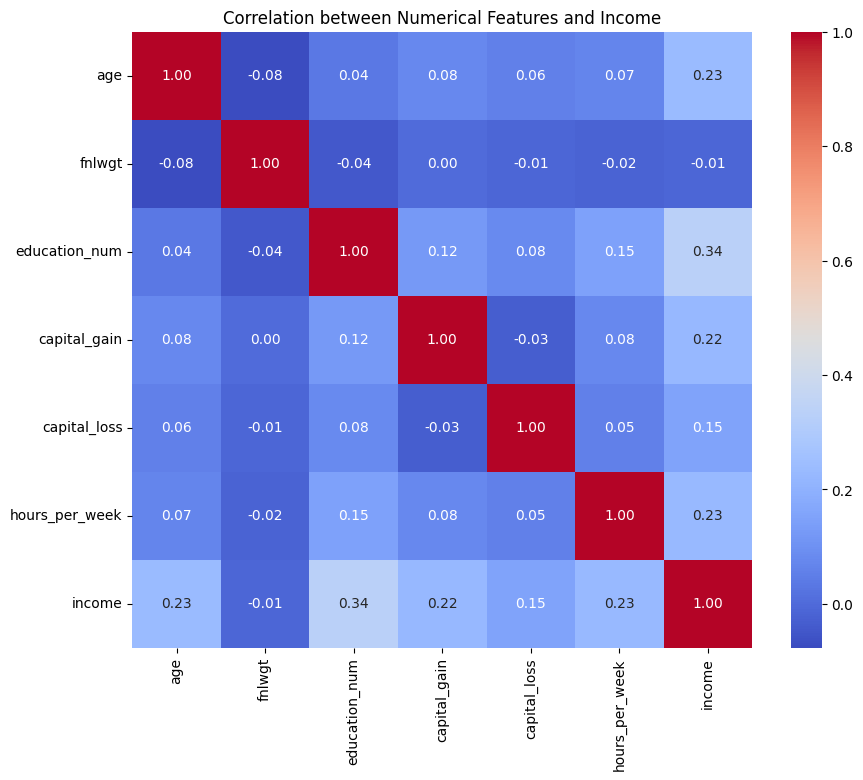

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'numerical_columns' is defined as earlier
# Create an instance of LabelEncoder
le = LabelEncoder()

# Encoding the target variable 'income'
encoded_income = le.fit_transform(adult_data['income'])

# Adding the encoded target variable to the numerical data
numerical_data_with_target = adult_data[numerical_columns].copy()
numerical_data_with_target['income'] = encoded_income

# Calculating the correlation matrix
correlation_matrix_numerical = numerical_data_with_target.corr()

# Plotting the heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Numerical Features and Income')
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Assuming 'income' is already encoded as a numerical variable
# If not, we would need to encode it using LabelEncoder as shown previously

# Performing ANOVA tests for each numerical feature
anova_results = []

for feature in numerical_columns:
    # Grouping the data based on 'income' categories
    groups = adult_data.groupby('income')[feature].apply(list)
    # Performing ANOVA test
    f_val, p_val = f_oneway(*groups)
    anova_results.append({'Feature': feature, 'F-Value': f_val, 'P-Value': p_val})

# Creating a DataFrame for ANOVA test results
anova_df = pd.DataFrame(anova_results).sort_values(by='F-Value', ascending=False)

anova_df

,Feature,F-Value,P-Value
2,education_num,4120.095780,0.000000e+00
0,age,1886.707314,0.000000e+00
5,hours_per_week,1813.386282,0.000000e+00
3,capital_gain,1709.150064,0.000000e+00
4,capital_loss,754.830452,2.686547e-164
1,fnlwgt,2.915594,8.773666e-02


Based on the results of the ANNOVA test, we are going to remove'fnlwgt’  from the dataset due to its negligible F-value and non-significant P-value, indicating a lack of useful predictive power for the income classification task.

**Data Preprocessing**

In [ ]:
# Feature Selection: Removing 'fnlwgt'
data = adult_df.drop(columns=['fnlwgt'])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Impute missing values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])


le = LabelEncoder()

# Encode categorical variables
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])


X = data.drop('income', axis=1)
y = data['income']


**CART Algorithm Implementation**

In [ ]:
# Custom Decision Tree Classifier Implementation
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def _measure_of_goodness(self, y, left_indices, right_indices):
        PL = np.sum(left_indices) / len(y)
        PR = 1 - PL
        class_probs_left = [np.sum(y[left_indices] == c) / np.sum(left_indices) for c in np.unique(y)]
        class_probs_right = [np.sum(y[right_indices] == c) / np.sum(right_indices) for c in np.unique(y)]
        measure = 2 * PL * PR * sum(abs(pl - pr) for pl, pr in zip(class_probs_left, class_probs_right))
        return measure

    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_measure = None, None, -np.inf
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue
                measure = self._measure_of_goodness(y, left_indices, right_indices)
                if measure > best_measure:
                    best_feature, best_threshold, best_measure = feature_idx, threshold, measure
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            most_common_class = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_class)

        feature_idx, threshold = self._find_best_split(X, y)
        if feature_idx is None:
            most_common_class = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_class)

        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature=feature_idx, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        # Convert X and y to NumPy arrays if they are not already
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    def _predict_one(self, x, node):
        while node.value is None:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        # Convert X to NumPy array if it is not already
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()

        return [self._predict_one(x, self.tree_) for x in X]

    def score(self, X, y):
        # Convert X to a NumPy array if it's a DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Make predictions and calculate accuracy
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        # Return parameters for this estimator.
        return {"max_depth": self.max_depth}
# Initialize the custom CART model
custom_model = CustomDecisionTreeClassifier(max_depth=5)

# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

# Initializing lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=123)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the custom model on the SMOTE-augmented training data
    custom_model.fit(X_train_smote, y_train_smote)

    # Evaluate the model on the original test data
    predictions = custom_model.predict(X_test)

    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions, average='binary'))
    recalls.append(recall_score(y_test, predictions, average='binary'))
    f1_scores.append(f1_score(y_test, predictions, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test, predictions))

# Calculating average of the metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

# Summing confusion matrices
total_conf_matrix = np.sum(conf_matrices, axis=0)

# Print the averaged metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average Weighted F1-Score:", avg_f1_score)
print("Total Confusion Matrix:\n", total_conf_matrix)

Average Accuracy: 0.7793369450339054
Average Precision: 0.5275804612943499
Average Recall: 0.8284685753282204
Average Weighted F1-Score: 0.7927909638561703
Total Confusion Matrix:
 [[18880  5840]
 [ 1345  6496]]


**Finding the Optimal max_depth value**

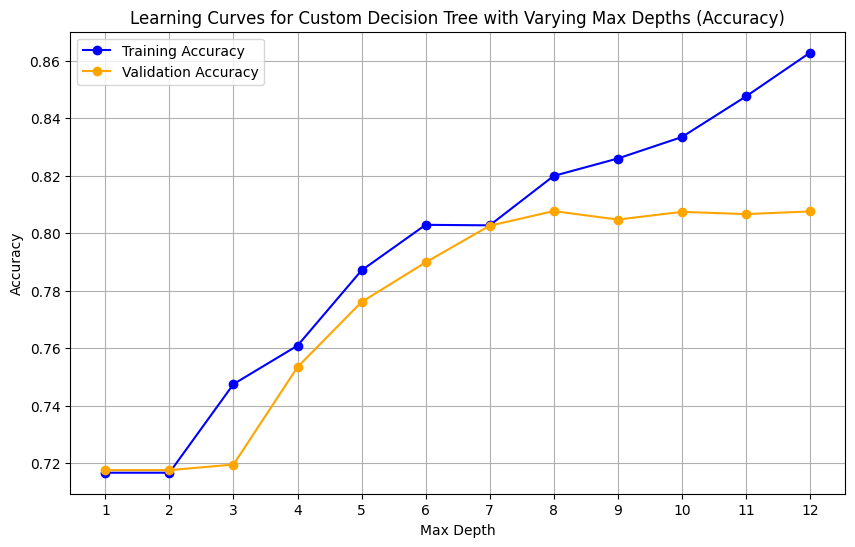

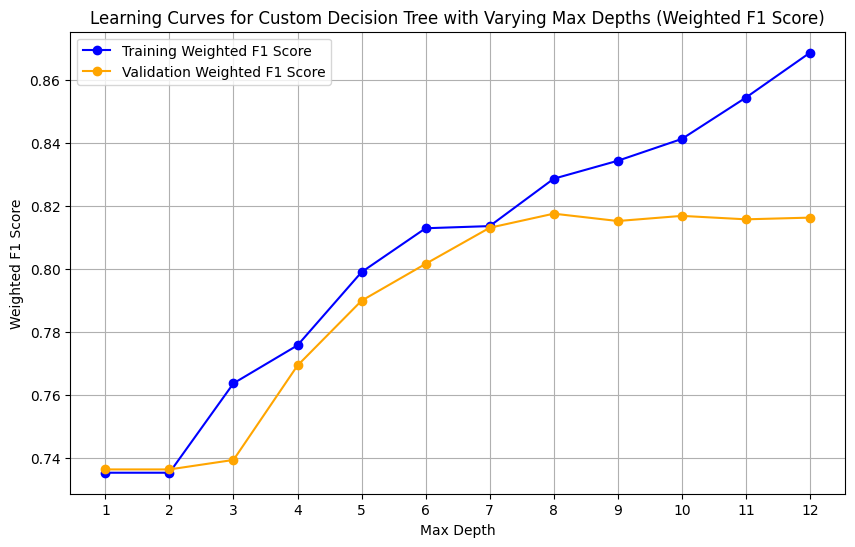

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Assuming Sklearn's DecisionTreeClassifier, X, y, X_train, y_train are already defined

train_scores, val_scores = [], []
train_f1_scores, val_f1_scores = [], []
max_depth_range = range(1, 13)  # Range of depths to explore

for depth in max_depth_range:
    model = CustomDecisionTreeClassifier(max_depth=depth)
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=123)),
        ('model', model)
    ])

    skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

    val_scores_acc_fold, val_scores_f1_fold = [], []
    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


        pipeline.fit(X_train_fold, y_train_fold)
        val_predictions = pipeline.predict(X_val_fold)

        val_scores_acc_fold.append(accuracy_score(y_val_fold, val_predictions))
        val_scores_f1_fold.append(f1_score(y_val_fold, val_predictions, average='weighted'))

    # Average scores across all folds
    val_scores.append(np.mean(val_scores_acc_fold))
    val_f1_scores.append(np.mean(val_scores_f1_fold))

    # Fit the model with SMOTE to the entire training set and calculate scores
    pipeline.fit(X_train, y_train)
    train_predictions = pipeline.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_predictions))
    train_f1_scores.append(f1_score(y_train, train_predictions, average='weighted'))

# Plotting the learning curves for accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(max_depth_range, val_scores, marker='o', label='Validation Accuracy', color='orange')
plt.xticks(max_depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Custom Decision Tree with Varying Max Depths (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the learning curves for weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_f1_scores, marker='o', label='Training Weighted F1 Score', color='blue')
plt.plot(max_depth_range, val_f1_scores, marker='o', label='Validation Weighted F1 Score', color='orange')
plt.xticks(max_depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Weighted F1 Score')
plt.title('Learning Curves for Custom Decision Tree with Varying Max Depths (Weighted F1 Score)')
plt.legend()
plt.grid(True)
plt.show()

After analysing the above line graphs, we find that the max_depth = 8 provides the most promising results




In [ ]:
# Custom Decision Tree Classifier Implementation
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def _measure_of_goodness(self, y, left_indices, right_indices):
        PL = np.sum(left_indices) / len(y)
        PR = 1 - PL
        class_probs_left = [np.sum(y[left_indices] == c) / np.sum(left_indices) for c in np.unique(y)]
        class_probs_right = [np.sum(y[right_indices] == c) / np.sum(right_indices) for c in np.unique(y)]
        measure = 2 * PL * PR * sum(abs(pl - pr) for pl, pr in zip(class_probs_left, class_probs_right))
        return measure

    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_measure = None, None, -np.inf
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue
                measure = self._measure_of_goodness(y, left_indices, right_indices)
                if measure > best_measure:
                    best_feature, best_threshold, best_measure = feature_idx, threshold, measure
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            most_common_class = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_class)

        feature_idx, threshold = self._find_best_split(X, y)
        if feature_idx is None:
            most_common_class = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_class)

        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature=feature_idx, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        # Convert X and y to NumPy arrays if they are not already
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    def _predict_one(self, x, node):
        while node.value is None:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        # Convert X to NumPy array if it is not already
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()

        return [self._predict_one(x, self.tree_) for x in X]

    def score(self, X, y):
        # Convert X to a NumPy array if it's a DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Make predictions and calculate accuracy
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        # Return parameters for this estimator.
        return {"max_depth": self.max_depth}
# Initialize the custom CART model
custom_model = CustomDecisionTreeClassifier(max_depth=8)

# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

# Initializing lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=123)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the custom model on the SMOTE-augmented training data
    custom_model.fit(X_train_smote, y_train_smote)

    # Evaluate the model on the original test data
    predictions = custom_model.predict(X_test)

    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions, average='binary'))
    recalls.append(recall_score(y_test, predictions, average='binary'))
    f1_scores.append(f1_score(y_test, predictions, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test, predictions))

# Calculating average of the metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

# Summing confusion matrices
total_conf_matrix = np.sum(conf_matrices, axis=0)

# Print the averaged metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average Weighted F1-Score:", avg_f1_score)
print("Total Confusion Matrix:\n", total_conf_matrix)

Average Accuracy: 0.8081450253809788
Average Precision: 0.571649894077234
Average Recall: 0.813926784089432
Average Weighted F1-Score: 0.8180113336350356
Total Confusion Matrix:
 [[19932  4788]
 [ 1459  6382]]


**Evaluating the Decision Tree Classifier from scikit-learn**

In [ ]:
# Initialize the scikit-learn Decision Tree model
sklearn_model = DecisionTreeClassifier(max_depth=8, random_state=123)

# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

# Initializing lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=123)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the scikit-learn model on the SMOTE-augmented training data
    sklearn_model.fit(X_train_smote, y_train_smote)

    # Evaluate the model on the original test data
    predictions = sklearn_model.predict(X_test)

    # Calculate and store metrics
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions, average='binary'))
    recalls.append(recall_score(y_test, predictions, average='binary'))
    f1_scores.append(f1_score(y_test, predictions, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test, predictions))

# Calculating average of the metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

# Summing confusion matrices
total_conf_matrix = np.sum(conf_matrices, axis=0)

# Print the averaged metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average Weighted F1-Score:", avg_f1_score)
print("Total Confusion Matrix:\n", total_conf_matrix)

Average Accuracy: 0.811522998282286
Average Precision: 0.5777967210533432
Average Recall: 0.8108702716755494
Average Weighted F1-Score: 0.8208975759503234
Total Confusion Matrix:
 [[20066  4654]
 [ 1483  6358]]


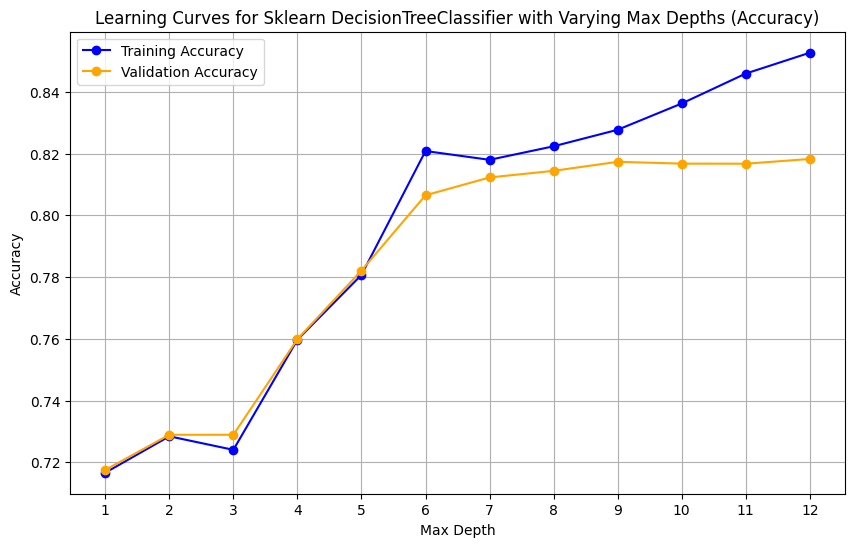

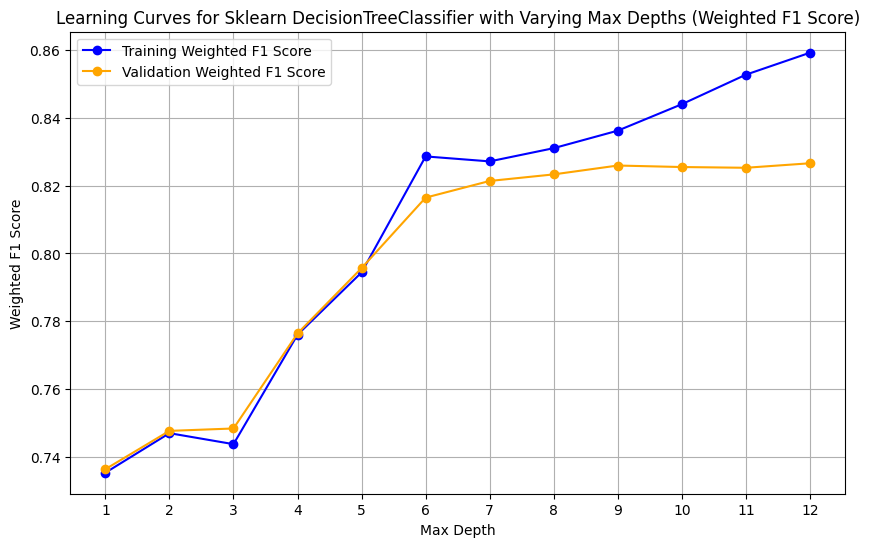

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Assuming Sklearn's DecisionTreeClassifier, X, y, X_train, y_train are already defined

train_scores, val_scores = [], []
train_f1_scores, val_f1_scores = [], []
max_depth_range = range(1, 13)  # Range of depths to explore

for depth in max_depth_range:
    model = DecisionTreeClassifier(max_depth=depth)
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=123)),
        ('model', model)
    ])

    skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

    val_scores_acc_fold, val_scores_f1_fold = [], []
    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


        pipeline.fit(X_train_fold, y_train_fold)
        val_predictions = pipeline.predict(X_val_fold)

        val_scores_acc_fold.append(accuracy_score(y_val_fold, val_predictions))
        val_scores_f1_fold.append(f1_score(y_val_fold, val_predictions, average='weighted'))

    # Average scores across all folds
    val_scores.append(np.mean(val_scores_acc_fold))
    val_f1_scores.append(np.mean(val_scores_f1_fold))

    # Fit the model with SMOTE to the entire training set and calculate scores
    pipeline.fit(X_train, y_train)
    train_predictions = pipeline.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_predictions))
    train_f1_scores.append(f1_score(y_train, train_predictions, average='weighted'))

# Plotting the learning curves for accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(max_depth_range, val_scores, marker='o', label='Validation Accuracy', color='orange')
plt.xticks(max_depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Sklearn DecisionTreeClassifier with Varying Max Depths (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the learning curves for weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_f1_scores, marker='o', label='Training Weighted F1 Score', color='blue')
plt.plot(max_depth_range, val_f1_scores, marker='o', label='Validation Weighted F1 Score', color='orange')
plt.xticks(max_depth_range)
plt.xlabel('Max Depth')
plt.ylabel('Weighted F1 Score')
plt.title('Learning Curves for Sklearn DecisionTreeClassifier with Varying Max Depths (Weighted F1 Score)')
plt.legend()
plt.grid(True)
plt.show()



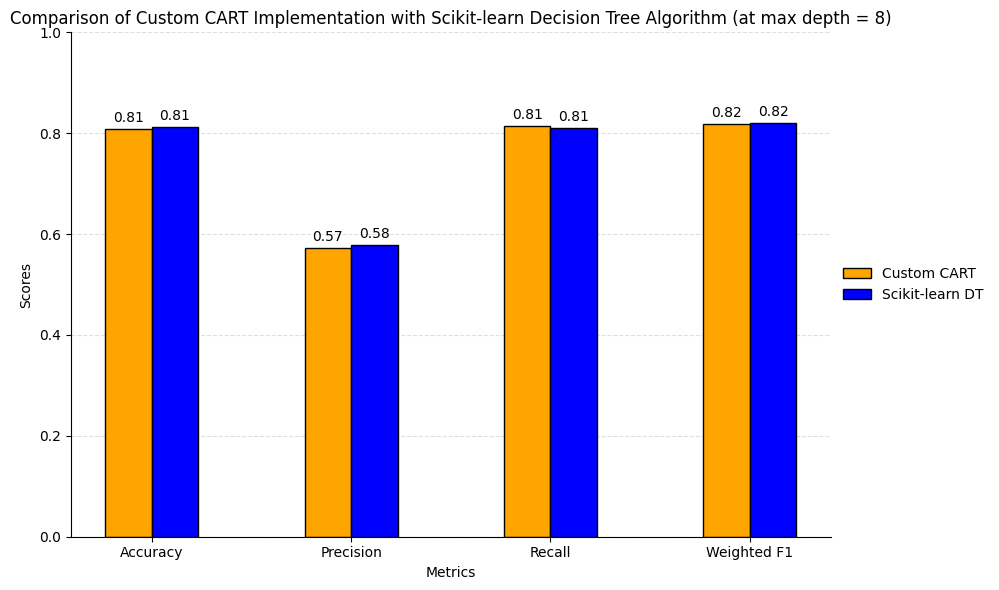

In [ ]:
# Metrics for the custom CART implementation
custom_CART_metrics = {
    "Accuracy": 0.8081450253809788,
    "Precision": 0.571649894077234,
    "Recall": 0.813926784089432,
    "Weighted F1": 0.8180113336350356
}

# Metrics for the scikit-learn Decision Tree model
sklearn_DT_metrics = {
    "Accuracy": 0.811522998282286,
    "Precision": 0.5777967210533432,
    "Recall": 0.8108702716755494,
    "Weighted F1": 0.8208975759503234
}

# Names of the metrics
metrics_names = list(custom_CART_metrics.keys())



# Values for each metric
custom_values = [custom_CART_metrics[name] for name in metrics_names]
sklearn_values = [sklearn_DT_metrics[name] for name in metrics_names]

# X locations for the groups
ind = np.arange(len(metrics_names))

# Bar width
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Using a narrower bar width to match the example given
narrow_width = width / 1.5

custom_bars = ax.bar(ind - narrow_width/2, custom_values, narrow_width, label='Custom CART', color='orange', edgecolor='black')
sklearn_bars = ax.bar(ind + narrow_width/2, sklearn_values, narrow_width, label='Scikit-learn DT', color='blue', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Custom CART Implementation with Scikit-learn Decision Tree Algorithm (at max depth = 8)')
ax.set_xticks(ind)
ax.set_xticklabels(metrics_names)

# Setting the y-axis scale from 0.0 to 1.0
ax.set_ylim(0.0, 1.0)

# Setting the background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid lines and setting behind the bars
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_axisbelow(True)

# Positioning the legend on the right-hand side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Attach a text label above each bar in *rects*, displaying its height, and adjusting font size
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

autolabel(custom_bars)
autolabel(sklearn_bars)

# Clean up the design
plt.tight_layout()

# Show the plot with improved aesthetics
plt.show()

# **Bonus Question**

In [ ]:
# Load the dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
data = pd.read_csv(path, header=None, names=column_names, na_values='?')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = imputer.fit_transform(data)

# Convert data back to DataFrame
data = pd.DataFrame(data, columns=column_names)

# Encode categorical variables
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Selecting 'age' as the target variable for regression
X = data.drop(['age'], axis=1)
y = data['age'].astype(int)  # Ensure the target is an integer

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def _variance_reduction(self, y, left_indices, right_indices):
        if len(y[left_indices]) < 2 or len(y[right_indices]) < 2:
          return 0

        var_total = np.var(y, ddof=1)
        var_left = np.var(y[left_indices], ddof=1) * len(y[left_indices]) / len(y)
        var_right = np.var(y[right_indices], ddof=1) * len(y[right_indices]) / len(y)
        reduction = var_total - (var_left + var_right)
        return reduction

    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_reduction = None, None, -np.inf
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue
                reduction = self._variance_reduction(y, left_indices, right_indices)
                if reduction > best_reduction:
                    best_feature, best_threshold, best_reduction = feature_idx, threshold, reduction
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            # For regression, return the mean of y
            return Node(value=np.mean(y))

        feature_idx, threshold = self._find_best_split(X, y)
        if feature_idx is None:
            return Node(value=np.mean(y))

        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold
        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature=feature_idx, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()
        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    def _predict_one(self, x, node):
        while node.value is None:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self._predict_one(x, self.tree_) for x in X]

    def score(self, X, y):
        predictions = self.predict(X)
        return mean_squared_error(y, predictions)

    def get_params(self, deep=True):
        return {"max_depth": self.max_depth}

  # Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize lists to store the scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the custom regressor model with the specified max_depth
    custom_regressor_model = CustomDecisionTreeRegressor(max_depth=8)

    # Fit the model to the current fold's training data
    custom_regressor_model.fit(X_train, y_train)

    # Predict on the test set
    predictions = custom_regressor_model.predict(X_test)

    # Calculate and append the metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate the average scores across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)

# Print the average scores
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Average Mean Absolute Error (MAE): {avg_mae}")
print(f"Average R-squared (R2): {avg_r2}")

Average Mean Squared Error (MSE): 105.66261961807943
Average Root Mean Squared Error (RMSE): 10.278596129409738
Average Mean Absolute Error (MAE): 7.866263549172212
Average R-squared (R2): 0.4315851647125591
